## CREDIT CARD FRAUD DETECTION 

### Problem statement:¶
- Credit card fraud detection is an immenent problem to every company in the banking industry. Detecting and preventing credit card fraud is a necessity for banks.

- Hence, our objective here is to develop a machine learning model that detects fraudulent transactions based on the historical transactional data of customers with a pool of merchants and provide a cost benefit analysis of the model to the stakeholders and provide them with appropriate recommendations to adopt in order to mitigate fraud risks.

#### Data Dictionary
- trans_date_trans_time -> Transaction time stamp
- cc_num -> Credit card number
- merchant -> merchant name
- category -> transaction category
- amt -> Transaction amount
- first -> First name of card holder
- last -> Last name of card holder
- gender -> Sex of card holder
- street -> transaction address
- city -> transaction city
- state -> transaction state
- zip -> transaction zipcode
- lat -> transaction lattitude
- long -> transaction longitude
- city_pop -> Population of the city
- job -> job of the card holder
- dob -> date of birth of card holder
- trans_num -> transaction number of transaction
- unix_time -> time in unix format
- merch_lat -> lattitude of the merchant
- merch_long -> longitude of merchant
- is_fraud -> nature of transaction (fraud or not fraud)

### Isolation Forest

- Isolation forest is one of the most efficient unsupervised learning algorithms when it comes to anomaly detection, it handles high dimensional data      very accurately.

- The model builds a Random Forest and at each node a Decision Tree is generated randomly which splits the dataset into two parts.

- The dataset gets split into smaller parts with time and each observation becomes unique and separable from every other observations.

- The anomalies are present deeper in the dataset and therefore can be easily isolated from the normal observations.


<img src="isolation_Forest.jpg"/>

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
card_data = pd.read_csv("creditcard.csv")

In [3]:
card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [45]:
card_data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [5]:
card_data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [6]:
frauds = card_data.loc[card_data['Class'].values == 1,:]

In [7]:
frauds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [48]:
100*card_data.Class.value_counts(normalize=True)

0    99.827251
1     0.172749
Name: Class, dtype: float64

#### 0 indicates that the observation is normal and 1 indicates that the observation is fraudulent.

#### Thus we have 99.827251% normal transactions and 0.172749% fraudulent transactions.

#### This data is very imbalanced thus we need to balance the data so that it does not produce any bias in our analysis.

### Balancing the base

In [53]:
pd.concat(
    [card_data['Amount'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
     card_data.loc[card_data['Class']==0,['Amount']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'Amount':'Non-Fraud Amt Distribution'}),
     card_data.loc[card_data['Class']==1,['Amount']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'Amount':'Fraud Amt Distribution'})], axis=1)

,Row Type,Amount,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,284807.000000,284315.000000,492.000000
1,mean,88.349619,88.291022,122.211321
2,std,250.120109,250.105092,256.683288
3,min,0.000000,0.000000,0.000000
4,50%,22.000000,22.000000,9.250000
5,95%,365.000000,364.409000,640.905000
6,99.9%,3000.000000,3000.000000,1970.620710
7,max,25691.160000,25691.160000,2125.870000


#### Here we can see that the total amount ditribution of non-fraud is very less than that of fraud distribution.

In [8]:
no_frauds = card_data.drop(index = frauds.index)
no_frauds = no_frauds.sample(n=492)
balanced = pd.concat([no_frauds , frauds])
balanced['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [9]:
balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
75763,56239.0,1.176747,-0.179946,0.228906,-0.263789,-0.248438,0.073745,-0.332705,0.229094,0.132111,...,0.110179,0.352468,0.015503,-0.218033,0.167888,1.147674,-0.063429,-0.019455,0.76,0
20104,30788.0,-1.674055,-0.139491,2.114330,-0.655928,-0.767239,-0.647068,-0.638209,0.860542,0.859059,...,-0.056496,-0.319911,0.058056,0.613708,-0.280089,0.797510,0.151458,-0.015621,20.00,0
117998,74907.0,1.122866,-1.855822,0.207881,-1.322298,-1.711198,-0.265297,-1.010876,-0.114408,-1.477658,...,0.014004,-0.078305,-0.295552,-0.467309,0.350147,-0.073180,0.004645,0.056639,237.00,0
140777,83923.0,0.864701,-0.924494,0.797626,0.785308,-1.279889,-0.147667,-0.387814,-0.041579,-1.064206,...,-0.183258,-0.338555,-0.149126,0.533943,0.354559,-0.390152,0.037836,0.062612,203.22,0
165250,117308.0,1.734839,-0.456696,-2.753120,0.054251,0.811670,-1.131527,1.197026,-0.561694,-0.289123,...,0.456081,1.049750,-0.360055,0.892113,0.690677,0.381076,-0.143903,-0.057216,202.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


<AxesSubplot: >

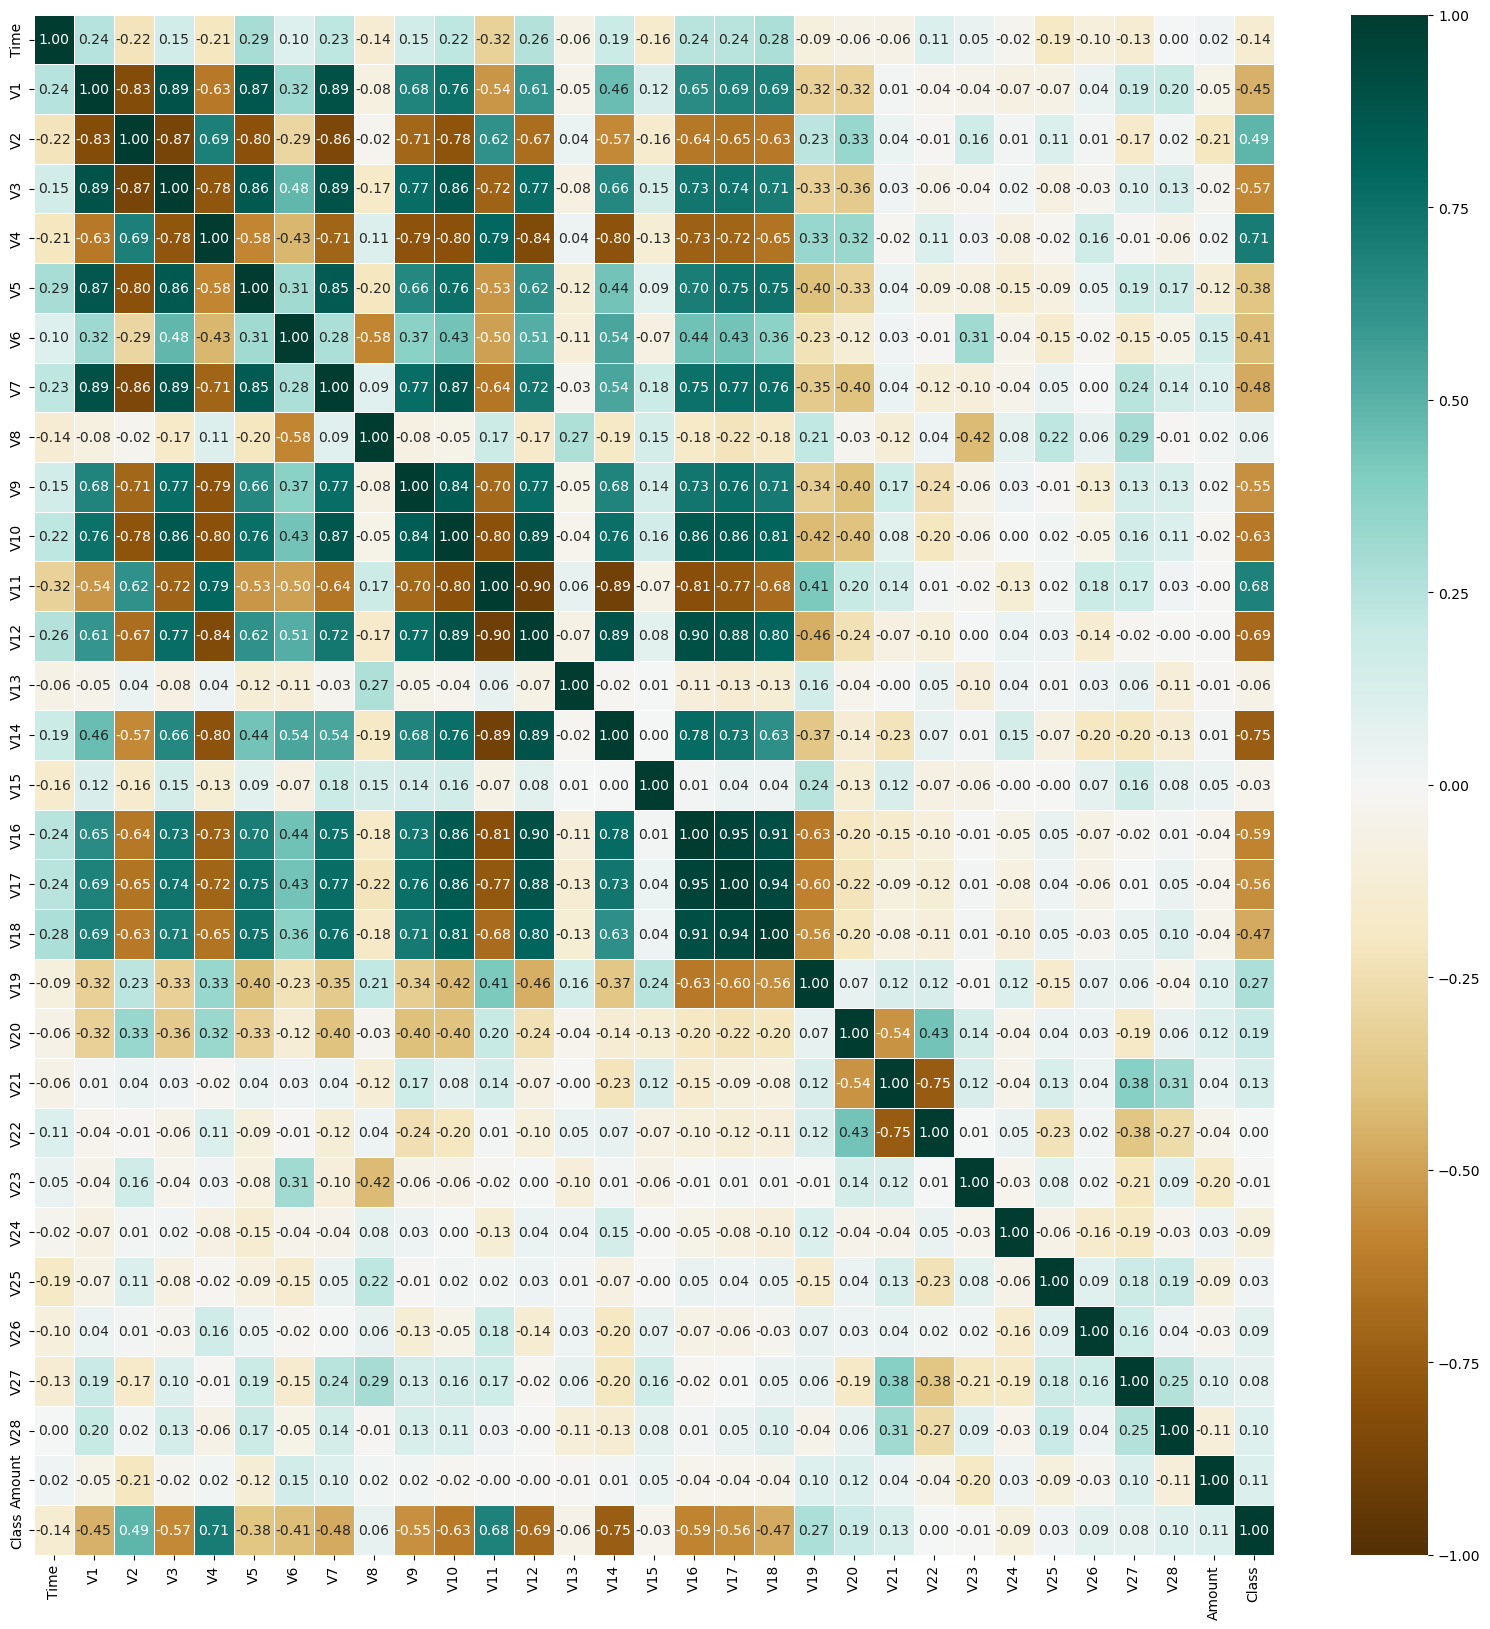

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
corr = balanced.corr()
sns.heatmap(corr, ax = ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

### Selecting the columns with most related data to the target

In [11]:
columns = balanced.loc[:,(corr.Class >= 0.48) | (corr.Class <= -0.49)]
columns['Time'] = balanced['Time']
columns['Amount'] = balanced['Amount']

In [12]:
columns

,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,Class,Time,Amount
75763,-0.179946,0.228906,-0.263789,0.132111,-0.067179,1.721906,0.505874,0.690913,-0.157232,0.083805,0,56239.0,0.76
20104,-0.139491,2.114330,-0.655928,0.859059,-1.212237,-0.828040,-0.300226,0.069027,-0.157984,0.619149,0,30788.0,20.00
117998,-1.855822,0.207881,-1.322298,-1.477658,1.340665,-1.358907,-1.479073,-0.382944,0.150753,0.108859,0,74907.0,237.00
140777,-0.924494,0.797626,0.785308,-1.064206,0.795016,1.180124,1.396739,-0.173857,-1.343767,-0.279014,0,83923.0,203.22
165250,-0.456696,-2.753120,0.054251,-0.289123,0.077886,1.092493,1.299256,0.958607,-0.816448,-0.353127,0,117308.0,202.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1.125653,-4.518331,1.749293,-2.064945,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,1,169142.0,390.00
280143,1.289381,-5.004247,1.411850,-1.127396,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,1,169347.0,0.76
280149,1.126366,-2.213700,0.468308,-0.652250,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,1,169351.0,77.89
281144,0.585864,-5.399730,1.817092,-1.632333,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,1,169966.0,245.00


In [13]:
balanced = balanced.loc[:, columns.columns]

In [14]:
balanced

,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,Class,Time,Amount
75763,-0.179946,0.228906,-0.263789,0.132111,-0.067179,1.721906,0.505874,0.690913,-0.157232,0.083805,0,56239.0,0.76
20104,-0.139491,2.114330,-0.655928,0.859059,-1.212237,-0.828040,-0.300226,0.069027,-0.157984,0.619149,0,30788.0,20.00
117998,-1.855822,0.207881,-1.322298,-1.477658,1.340665,-1.358907,-1.479073,-0.382944,0.150753,0.108859,0,74907.0,237.00
140777,-0.924494,0.797626,0.785308,-1.064206,0.795016,1.180124,1.396739,-0.173857,-1.343767,-0.279014,0,83923.0,203.22
165250,-0.456696,-2.753120,0.054251,-0.289123,0.077886,1.092493,1.299256,0.958607,-0.816448,-0.353127,0,117308.0,202.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1.125653,-4.518331,1.749293,-2.064945,-5.587794,2.115795,-5.417424,-6.665177,-2.897825,-4.570529,1,169142.0,390.00
280143,1.289381,-5.004247,1.411850,-1.127396,-3.232153,2.858466,-3.096915,-5.210141,-2.155297,-3.267116,1,169347.0,0.76
280149,1.126366,-2.213700,0.468308,-0.652250,-3.463891,1.794969,-2.775022,-4.057162,-1.603015,-5.035326,1,169351.0,77.89
281144,0.585864,-5.399730,1.817092,-1.632333,-5.245984,1.933520,-5.030465,-6.416628,-2.549498,-4.614717,1,169966.0,245.00


### Label Encoding the data

In [64]:
for col in card_data.columns:
    if card_data[col].dtype == "object":
        le = LabelEncoder()
        data[col].fillna("None",inplace=True)
        le.fit(list(data[col].astypestr).values)
        card_data[col] = le.transform(list(card_data[col].astype(str).values))
        
    else:
        card_data[col].fillna(-999, inplace=True)

    

In [65]:
card_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Models

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

X = balanced.drop(columns = 'Class')
y = balanced['Class']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=1)

In [16]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion='entropy'
                             , max_depth = 3
                             , random_state = 0)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [17]:
y_pred_dtree = d_tree.predict(X_valid)
score_dtree = d_tree.score(X_valid, y_valid) 
print(score_dtree)

0.9187817258883249


In [18]:
report=classification_report(y_true=y_valid,y_pred=y_pred_dtree)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92        95
           1       0.99      0.85      0.92       102

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)


RandomForestClassifier()

In [20]:
y_pred_random = random_forest.predict(X_valid)
score_random = random_forest.score(X_valid, y_valid) 
print(score_random)

0.9289340101522843


In [21]:
report=classification_report(y_true=y_valid,y_pred= y_pred_random)
print(report)


              precision    recall  f1-score   support

           0       0.88      0.99      0.93        95
           1       0.99      0.87      0.93       102

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [23]:
y_pred_gb = gb.predict(X_valid)
score_gb = gb.score(X_valid, y_valid) 
print(score_gb)


0.9238578680203046


In [24]:
report=classification_report(y_true=y_valid,y_pred= y_pred_gb)
print(report)


              precision    recall  f1-score   support

           0       0.88      0.98      0.93        95
           1       0.98      0.87      0.92       102

    accuracy                           0.92       197
   macro avg       0.93      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197



In [25]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [26]:
y_pred_ada = ada.predict(X_valid)
score_ada = ada.score(X_valid, y_valid) 
print(score_ada)

0.9238578680203046


In [27]:
report=classification_report(y_true=y_valid,y_pred= y_pred_ada)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        95
           1       0.95      0.90      0.92       102

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [29]:

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [30]:
oversample = SMOTE()

In [34]:
card_data_smo = card_data.loc[:, balanced.columns]

In [35]:
X_smo = card_data_smo.drop('Class', axis = 1)
y_smo = card_data_smo['Class']


In [36]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_smo, y_smo = pipeline.fit_resample(X_smo, y_smo)

In [37]:
y_smo.value_counts()


0    56862
1    28431
Name: Class, dtype: int64

In [38]:
X_train_smo, X_valid_smo, y_train_smo, y_valid_smo = train_test_split(X_smo, y_smo, test_size=0.20, random_state=1)

In [39]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion='entropy'
                             , max_depth = 3
                             , random_state = 0)
d_tree.fit(X_train_smo,y_train_smo)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [40]:
y_pred_dtree = d_tree.predict(X_valid_smo)
score_dtree = d_tree.score(X_valid_smo, y_valid_smo) 
print(score_dtree)

0.9634210680579166


In [41]:
report=classification_report(y_true=y_valid_smo,y_pred=y_pred_dtree)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11404
           1       0.97      0.92      0.94      5655

    accuracy                           0.96     17059
   macro avg       0.96      0.95      0.96     17059
weighted avg       0.96      0.96      0.96     17059



In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train_smo, y_train_smo)


GradientBoostingClassifier()

In [43]:
y_pred_gb = gb.predict(X_valid_smo)
score_gb = gb.score(X_valid_smo, y_valid_smo) 
print(score_gb)

0.9849932586904273


In [44]:
report=classification_report(y_true=y_valid_smo,y_pred=y_pred_gb)
print(report)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11404
           1       0.99      0.96      0.98      5655

    accuracy                           0.98     17059
   macro avg       0.99      0.98      0.98     17059
weighted avg       0.99      0.98      0.98     17059



### Isolation Forest

In [59]:
from sklearn.ensemble import IsolationForest

contamination = 0.01

In [60]:
%%time
model = IsolationForest(contamination = contamination, n_estimators=1000)
model.fit(card_data)

CPU times: user 33.2 s, sys: 342 ms, total: 33.6 s
Wall time: 33.6 s


IsolationForest(contamination=0.01, n_estimators=1000)

In [67]:
card_data["iforest"] = pd.Series(model.predict(card_data))
card_data["iforest"] = card_data["iforest"].map({1:0,-1:1})
print(card_data["iforest"].value_counts())

0    281958
1      2849
Name: iforest, dtype: int64


In [68]:
2849 / 281958

0.010104341781400067

In [75]:
print("Accuracy percentage:", 100*list(card_data['Class']).count(-1)/(frauds))

Accuracy percentage:         Time   V1   V2   V3   V4   V5   V6   V7   V8   V9  ...  V21  V22  V23  \
541      0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0  ...  0.0 -0.0 -0.0   
623      0.0 -0.0 -0.0  0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  ...  0.0  0.0  0.0   
4920     0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  ... -0.0 -0.0  0.0   
6108     0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  ...  0.0  0.0 -0.0   
6329     0.0  0.0  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  ... -0.0 -0.0 -0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
279863   0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0  ...  0.0 -0.0  0.0   
280143   0.0  0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0  0.0 -0.0  ...  0.0  0.0 -0.0   
280149   0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0  ...  0.0  0.0  0.0   
281144   0.0 -0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0  ...  0.0 -0.0 -0.0   
281674   0.0  0.0  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0  ... -0.0 -0.0 -0.0   

      